# Including Libraries:

In [22]:
import numpy as np # Linear Algebra
import pandas as pd # Data Processing, CSV File I/O (EG: pd.read_csv)
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


import os

# Including the Datasets:

In [23]:
Crema_Path='../input/SER-Data/SER_Data!/Crema/'
Ravdess_Path='../input/SER-Data/SER_Data!/Ravdess/audio_speech_actors_01-24'
Savee_Path='../input/SER-Data/SER_Data!/Savee/'
Tess_Path='../input/SER-Data/SER_Data!/Tess/'

# Analyzing the Data:

### Crema:

In [24]:
crema=[]

for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
        
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

,Emotion,File_Path
0,disgust,../input/SER-Data/SER_Data!/Crema//1028_TSI_DI...
1,happy,../input/SER-Data/SER_Data!/Crema//1075_IEO_HA...
2,happy,../input/SER-Data/SER_Data!/Crema//1084_ITS_HA...
3,disgust,../input/SER-Data/SER_Data!/Crema//1067_IWW_DI...
4,disgust,../input/SER-Data/SER_Data!/Crema//1066_TIE_DI...


In [25]:
Crema_df['Emotion'].unique()

array(['disgust', 'happy', 'sad', 'neutral', 'fear', 'angry'],
      dtype=object)

### Ravdess:

In [26]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

,Emotion,File_Path
0,surprise,../input/SER-Data/SER_Data!/Ravdess/audio_spee...
1,neutral,../input/SER-Data/SER_Data!/Ravdess/audio_spee...
2,disgust,../input/SER-Data/SER_Data!/Ravdess/audio_spee...
3,disgust,../input/SER-Data/SER_Data!/Ravdess/audio_spee...
4,neutral,../input/SER-Data/SER_Data!/Ravdess/audio_spee...


In [27]:
Ravdess_df['Emotion'].unique()

array(['surprise', 'neutral', 'disgust', 'fear', 'sad', 'happy', 'angry'],
      dtype=object)

### Savee:

In [28]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

,Emotion,File_Path
0,happy,../input/SER-Data/SER_Data!/Savee//JE_h09.wav
1,fear,../input/SER-Data/SER_Data!/Savee//KL_f12.wav
2,happy,../input/SER-Data/SER_Data!/Savee//DC_h03.wav
3,disgust,../input/SER-Data/SER_Data!/Savee//DC_d04.wav
4,angry,../input/SER-Data/SER_Data!/Savee//KL_a14.wav


In [29]:
Savee_df['Emotion'].unique()

array(['happy', 'fear', 'disgust', 'angry', 'surprise', 'neutral', 'sad'],
      dtype=object)

### Tess:

In [30]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

,Emotion,File_Path
0,fear,../input/SER-Data/SER_Data!/Tess/YAF_fear/YAF_...
1,fear,../input/SER-Data/SER_Data!/Tess/YAF_fear/YAF_...
2,fear,../input/SER-Data/SER_Data!/Tess/YAF_fear/YAF_...
3,fear,../input/SER-Data/SER_Data!/Tess/YAF_fear/YAF_...
4,fear,../input/SER-Data/SER_Data!/Tess/YAF_fear/YAF_...


In [31]:
Tess_df['Emotion'].unique()

array(['fear', 'angry', 'disgust', 'neutral', 'sad', 'surprise', 'happy'],
      dtype=object)

In [32]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12162, 2)

In [33]:
main_df.head(15)

,Emotion,File_Path
0,disgust,../input/SER-Data/SER_Data!/Crema//1028_TSI_DI...
1,happy,../input/SER-Data/SER_Data!/Crema//1075_IEO_HA...
2,happy,../input/SER-Data/SER_Data!/Crema//1084_ITS_HA...
3,disgust,../input/SER-Data/SER_Data!/Crema//1067_IWW_DI...
4,disgust,../input/SER-Data/SER_Data!/Crema//1066_TIE_DI...
5,disgust,../input/SER-Data/SER_Data!/Crema//1027_DFA_DI...
6,happy,../input/SER-Data/SER_Data!/Crema//1032_IEO_HA...
7,sad,../input/SER-Data/SER_Data!/Crema//1023_TIE_SA...
8,disgust,../input/SER-Data/SER_Data!/Crema//1041_TAI_DI...
9,sad,../input/SER-Data/SER_Data!/Crema//1004_WSI_SA...


In [34]:
main_df.tail(15)

,Emotion,File_Path
2785,surprise,../input/SER-Data/SER_Data!/Tess/YAF_pleasant_...
2786,surprise,../input/SER-Data/SER_Data!/Tess/YAF_pleasant_...
2787,surprise,../input/SER-Data/SER_Data!/Tess/YAF_pleasant_...
2788,surprise,../input/SER-Data/SER_Data!/Tess/YAF_pleasant_...
2789,surprise,../input/SER-Data/SER_Data!/Tess/YAF_pleasant_...
2790,surprise,../input/SER-Data/SER_Data!/Tess/YAF_pleasant_...
2791,surprise,../input/SER-Data/SER_Data!/Tess/YAF_pleasant_...
2792,surprise,../input/SER-Data/SER_Data!/Tess/YAF_pleasant_...
2793,surprise,../input/SER-Data/SER_Data!/Tess/YAF_pleasant_...
2794,surprise,../input/SER-Data/SER_Data!/Tess/YAF_pleasant_...


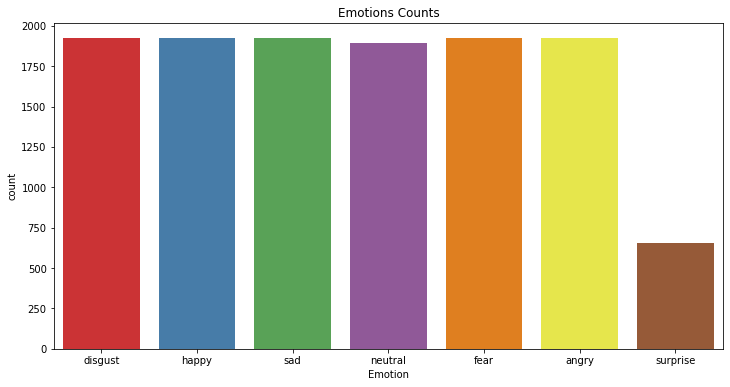

In [90]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set1')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=0)
plt.show()

In [36]:
emotion_names=main_df['Emotion'].unique()

In [37]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [38]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} Emotion for Waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [39]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} Emotion for Spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

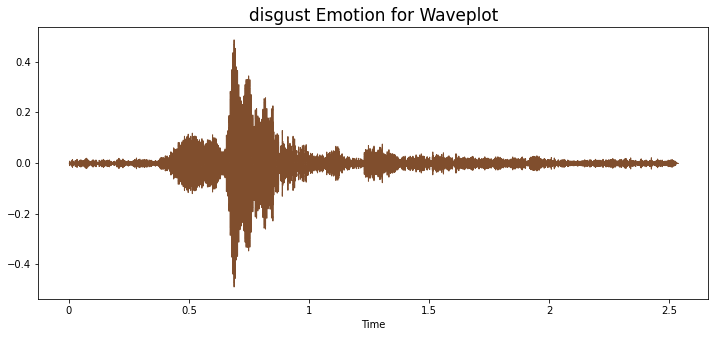

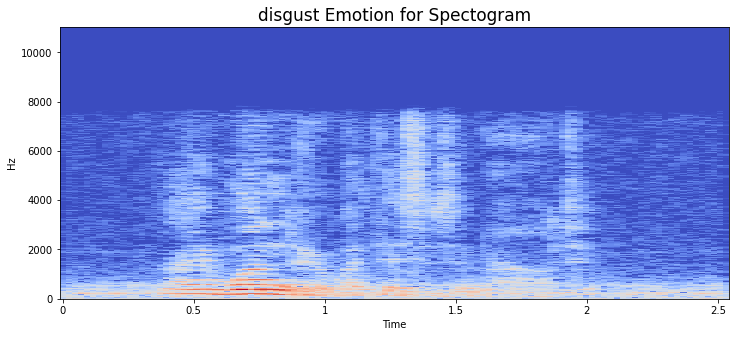

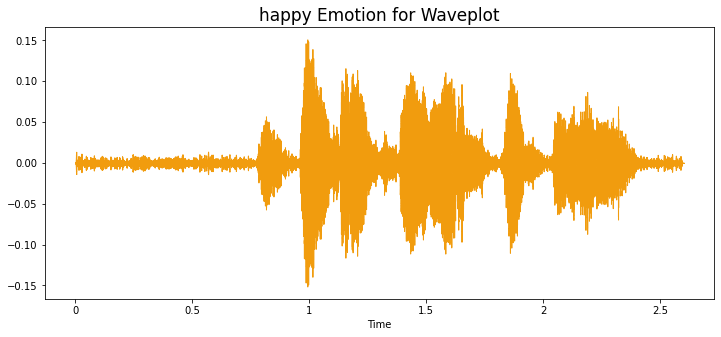

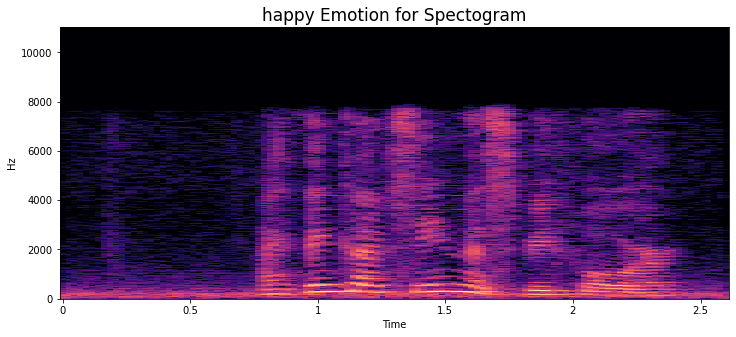

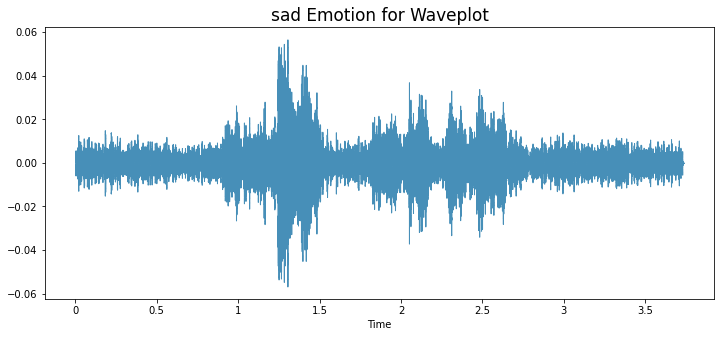

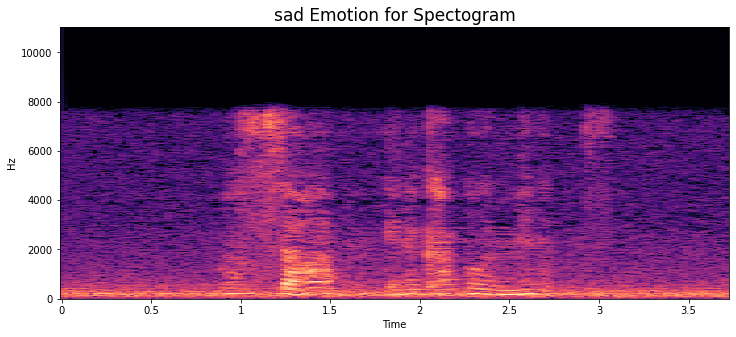

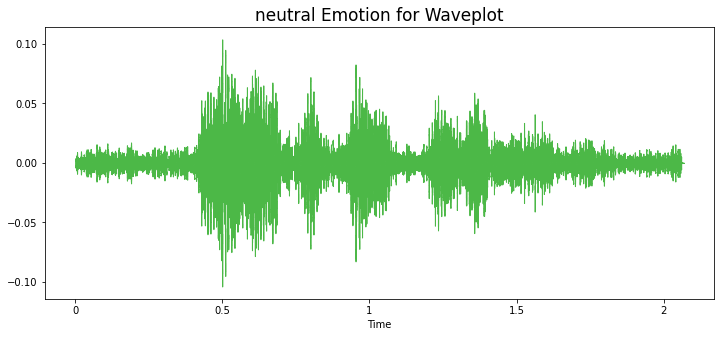

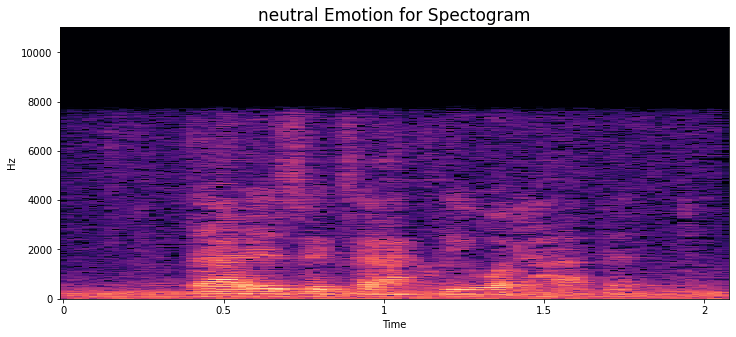

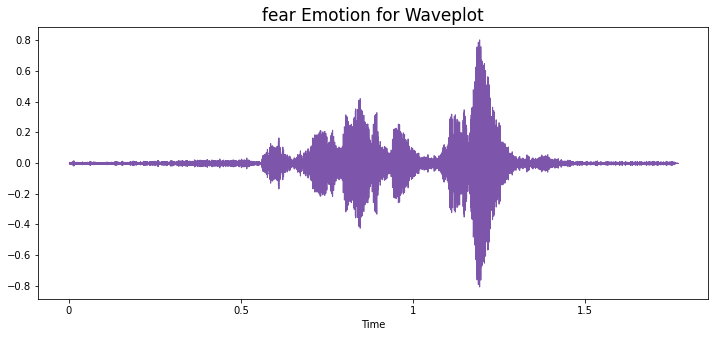

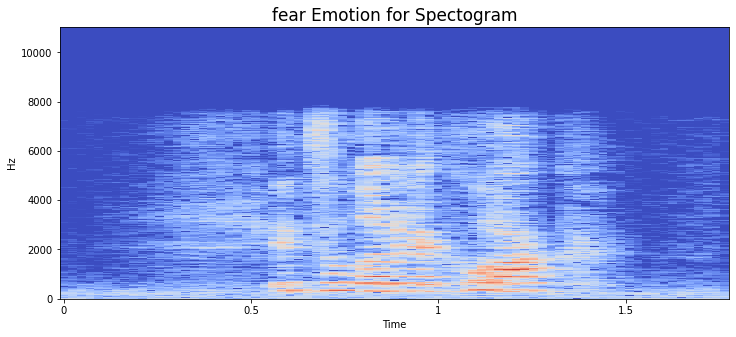

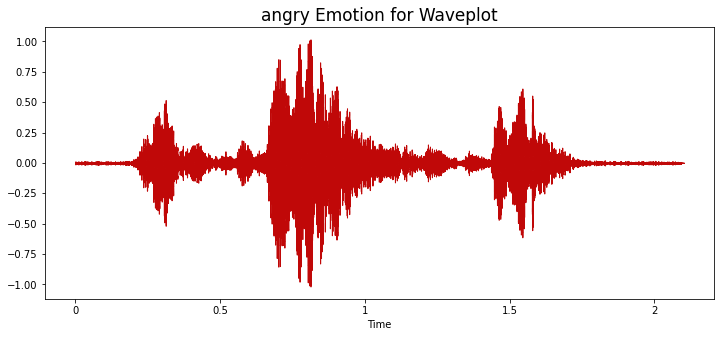

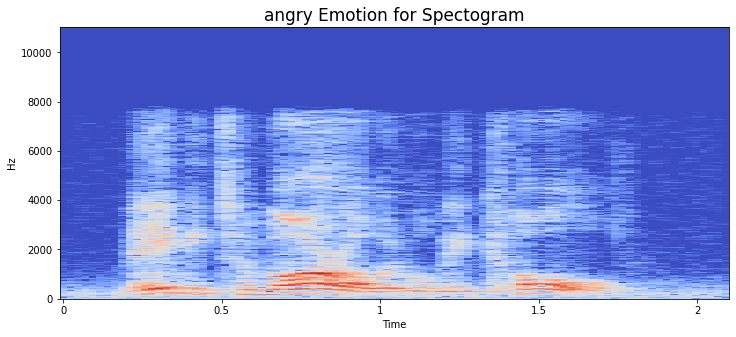

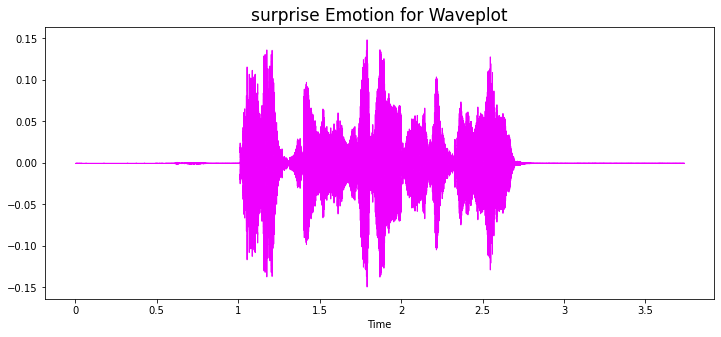

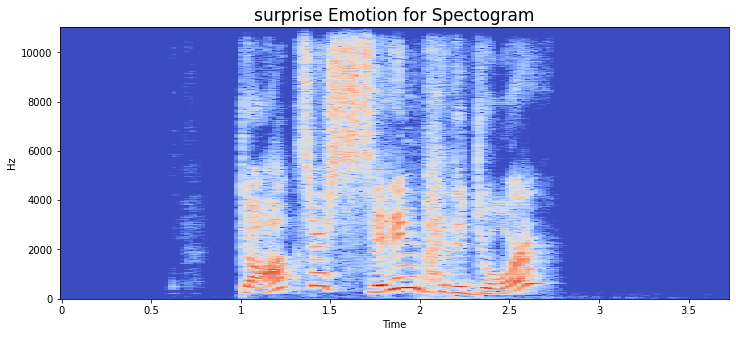

In [40]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [41]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [42]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample



In [43]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [44]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample



In [45]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [46]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[5])

Angry Audio Sample



In [47]:
print('Surprise Audio Sample\n')
IPython.display.Audio(audio_path[6])

Surprise Audio Sample




# Audio Augmentation:

In [48]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def pitching(data,sr,pitch_factor=0.7,random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data,sr,pitch_factor)

def streching(data,rate=0.8):
    return librosa.effects.time_stretch(data,rate)
    

In [49]:
data,sr=librosa.load(audio_path[6])

### Original Audio:

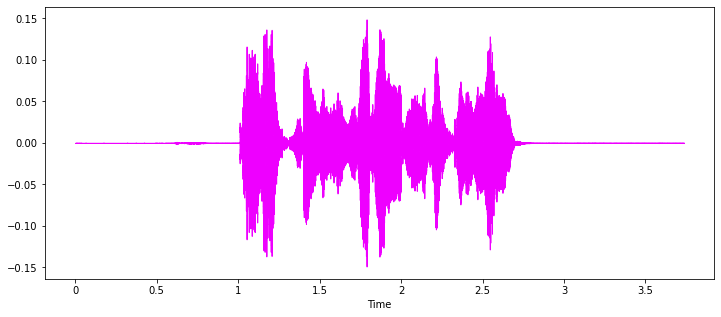

In [50]:
plt.figure(figsize=(12,5))
librosa.display.waveshow(data,sr,color='#EE00FF')
IPython.display.Audio(audio_path[6])


### Noised Audio:

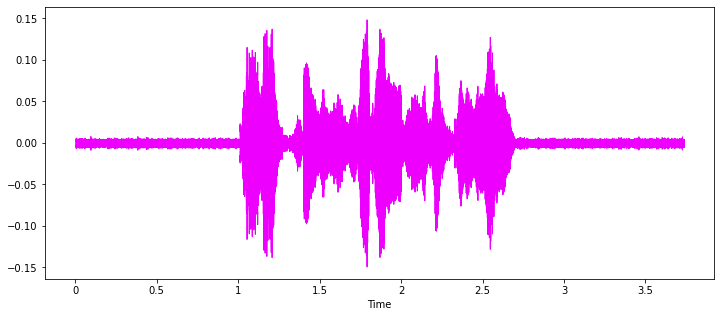

In [51]:
noised_audio=add_noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(noised_audio,sr,color='#EE00FF')
IPython.display.Audio(noised_audio,rate=sr)


### Streched Audio:

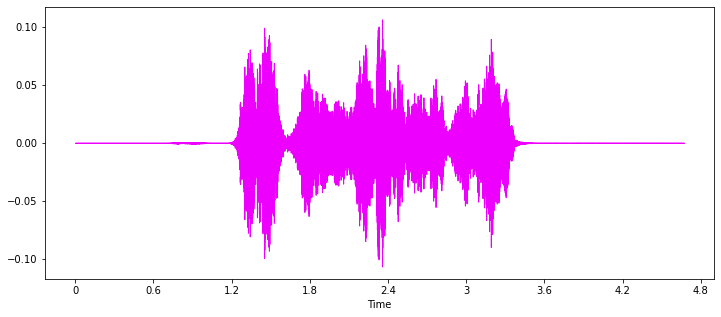

In [52]:
stretched_audio=streching(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(stretched_audio,sr,color='#EE00FF')
IPython.display.Audio(stretched_audio,rate=sr)


### Shifted Audio:

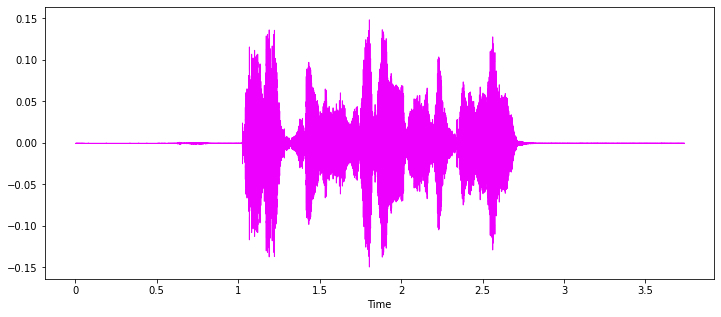

In [53]:
shifted_audio=shifting(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(shifted_audio,sr,color='#EE00FF')
IPython.display.Audio(shifted_audio,rate=sr)


### Pitched Audio:

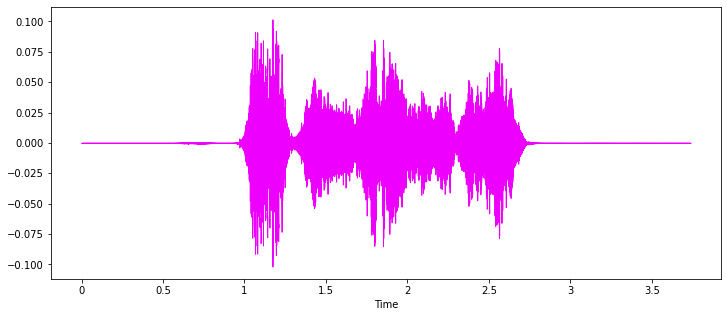

In [54]:
pitched_audio=pitching(data,sr)
plt.figure(figsize=(12,5))
librosa.display.waveshow(pitched_audio,sr,color='#EE00FF')
IPython.display.Audio(pitched_audio,rate=sr)


# Feature Extraction:

In [55]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

# Duration and Offset are used to take care of the NO Audio in Start and the Ending of each Audio Files.
def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    audio=np.array(aud)
    
    noised_audio=add_noise(data,random=True)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitching(data,sr,random=True)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitching(data,sr,random=True)
    pitched_noised_audio=add_noise(pitched_audio1,random=True)
    aud4=extract_features(pitched_noised_audio,sr)
    audio=np.vstack((audio,aud4))
    
    return audio


# Processing:

In [56]:
X,Y=[],[]
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    features=get_features(path)
    if index%500==0:
        print(f'{index} Audio has been Processed')
    for i in features:
        X.append(i)  
        Y.append(emotion)
print('Done')

0 Audio has been Processed
500 Audio has been Processed
1000 Audio has been Processed
1500 Audio has been Processed
2000 Audio has been Processed
2500 Audio has been Processed
3000 Audio has been Processed
3500 Audio has been Processed
4000 Audio has been Processed
4500 Audio has been Processed
5000 Audio has been Processed
5500 Audio has been Processed
6000 Audio has been Processed
6500 Audio has been Processed
7000 Audio has been Processed
7500 Audio has been Processed
8000 Audio has been Processed
8500 Audio has been Processed
9000 Audio has been Processed
9500 Audio has been Processed
10000 Audio has been Processed
10500 Audio has been Processed
11000 Audio has been Processed
11500 Audio has been Processed
12000 Audio has been Processed
Done


In [57]:
processed_data_path='./processed_data.csv'

In [58]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.121094,0.187012,0.234863,0.244629,0.244629,0.239746,0.231445,0.178711,0.123535,0.073730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
1,0.134277,0.197266,0.247559,0.255371,0.251465,0.256348,0.257812,0.208008,0.149902,0.097168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
2,0.112305,0.161621,0.209473,0.237305,0.246094,0.257324,0.234863,0.167480,0.114258,0.064941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
3,0.119141,0.161621,0.209961,0.227051,0.240234,0.253418,0.229980,0.170410,0.104004,0.061035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
4,0.016113,0.021484,0.029297,0.030762,0.033691,0.036133,0.038574,0.046875,0.054688,0.062500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
5,0.016113,0.022461,0.030273,0.031738,0.034180,0.036133,0.039551,0.047852,0.055664,0.063477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
6,0.017578,0.023926,0.034180,0.035645,0.040039,0.039551,0.043457,0.048828,0.055176,0.064453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
7,0.017578,0.023926,0.032715,0.034668,0.039551,0.039062,0.043457,0.049316,0.055176,0.063477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
8,0.013184,0.020020,0.026855,0.028809,0.026855,0.031250,0.036133,0.040527,0.050293,0.054199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
9,0.014160,0.023926,0.031738,0.033691,0.032715,0.033203,0.036133,0.038574,0.047363,0.053223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy



# Including Analyzed Audio Features:

In [59]:
df=pd.read_csv(processed_data_path)
df.shape

(48648, 2377)

In [60]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(48648, 2377)

In [61]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.121094,0.187012,0.234863,0.244629,0.244629,0.239746,0.231445,0.178711,0.123535,0.073730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
1,0.134277,0.197266,0.247559,0.255371,0.251465,0.256348,0.257812,0.208008,0.149902,0.097168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
2,0.112305,0.161621,0.209473,0.237305,0.246094,0.257324,0.234863,0.167480,0.114258,0.064941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
3,0.119141,0.161621,0.209961,0.227051,0.240234,0.253418,0.229980,0.170410,0.104004,0.061035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disgust
4,0.016113,0.021484,0.029297,0.030762,0.033691,0.036133,0.038574,0.046875,0.054688,0.062500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
5,0.016113,0.022461,0.030273,0.031738,0.034180,0.036133,0.039551,0.047852,0.055664,0.063477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
6,0.017578,0.023926,0.034180,0.035645,0.040039,0.039551,0.043457,0.048828,0.055176,0.064453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
7,0.017578,0.023926,0.032715,0.034668,0.039551,0.039062,0.043457,0.049316,0.055176,0.063477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
8,0.013184,0.020020,0.026855,0.028809,0.026855,0.031250,0.036133,0.040527,0.050293,0.054199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy
9,0.014160,0.023926,0.031738,0.033691,0.032715,0.033203,0.036133,0.038574,0.047363,0.053223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy



# Processing Analyzed Data for Training:

In [62]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [63]:
lb=LabelEncoder()
Y=np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Splitting of Data:

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38918, 2376), (9730, 2376), (38918, 7), (9730, 7))

In [65]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 7), (9730, 7), (3892, 7))

In [66]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((35026, 2376), (9730, 2376), (3892, 2376), (35026, 7), (9730, 7), (3892, 7))

In [67]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((35026, 2376, 1), (9730, 2376, 1), (3892, 2376, 1))


# Tuning for Training:

In [68]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [69]:
EPOCH=50
BATCH_SIZE=64

In [91]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 2376, 512)         3072      
_________________________________________________________________
batch_normalization_6 (Batch (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1188, 512)         0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1188, 512)         1311232   
_________________________________________________________________
batch_normalization_7 (Batch (None, 1188, 512)         2048      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 594, 512)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 594, 256)         

In [92]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/50
548/548 [==============================] - 96s 170ms/step - loss: 1.3845 - accuracy: 0.4734 - val_loss: 1.4103 - val_accuracy: 0.4463
Epoch 2/50
548/548 [==============================] - 93s 169ms/step - loss: 1.0852 - accuracy: 0.5783 - val_loss: 1.2201 - val_accuracy: 0.5254
Epoch 3/50
548/548 [==============================] - 93s 170ms/step - loss: 0.9576 - accuracy: 0.6301 - val_loss: 1.0446 - val_accuracy: 0.6161
Epoch 4/50
548/548 [==============================] - 93s 170ms/step - loss: 0.8499 - accuracy: 0.6764 - val_loss: 1.4043 - val_accuracy: 0.5044
Epoch 5/50
548/548 [==============================] - 93s 169ms/step - loss: 0.7186 - accuracy: 0.7270 - val_loss: 0.9018 - val_accuracy: 0.6603
Epoch 6/50
548/548 [==============================] - 92s 169ms/step - loss: 0.5905 - accuracy: 0.7810 - val_loss: 0.7732 - val_accuracy: 0.7120
Epoch 7/50
548/548 [==============================] - 92s 169ms/step - loss: 0.4233 - accuracy: 0.8476 - val_loss: 0.6328 - val_ac

KeyboardInterrupt: 

# Demonstrations:


### Accuracy Graph:

In [72]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'According to the epoch accuracy and validation accuracy chart for the model')
fig.show()


### Loss Graph:

In [73]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'According to the Epoch Loss and Validation Loss Chart for the Model')
fig.show()


# Testing Model Results:

In [74]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

2022-09-30 15:25:38.903379: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 92473920 exceeds 10% of free system memory.
2022-09-30 15:25:38.951625: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 92473920 exceeds 10% of free system memory.


array([3, 3, 0, ..., 4, 4, 3])

In [75]:
y_check=np.argmax(y_test,axis=1)
y_check

array([3, 3, 0, ..., 4, 4, 3])

In [76]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.2422250658273697
Test Accuracy: 0.9466598033905029



# Confusion Matrix:

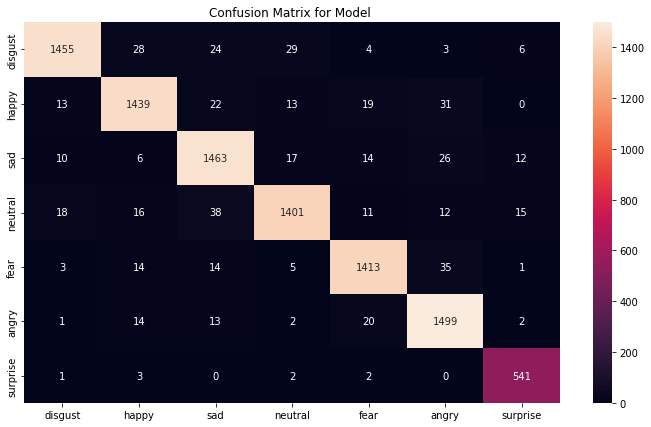

In [77]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'Confusion Matrix for Model ')
plt.show()

In [78]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

     disgust       0.97      0.94      0.95      1549
       happy       0.95      0.94      0.94      1537
         sad       0.93      0.95      0.94      1548
     neutral       0.95      0.93      0.94      1511
        fear       0.95      0.95      0.95      1485
       angry       0.93      0.97      0.95      1551
    surprise       0.94      0.99      0.96       549

    accuracy                           0.95      9730
   macro avg       0.95      0.95      0.95      9730
weighted avg       0.95      0.95      0.95      9730



In [79]:
 model_path = "./res_model.h5"

model.save(model_path)